Importing the required libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")

Uploading the Dataset

In [19]:
#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv
dataset = pd.read_csv(r"C:\Users\User\DS_Projekt arbeit\Exercises\Datasets\Diabetes_binary.csv")
dataset.rename(columns= {'Diabetes_binary': 'Diabetes'}, inplace=True)

Data understanding / Preparation / Preprocessing

In [48]:
dataset.shape # number of rows and columns

(253680, 22)

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [50]:
dataset.describe() #summary statistics of the dataset

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [51]:
dataset.corr() #pairwise correlation between variables

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [4]:
#splitting dataset into train and test
x = dataset.drop(["Diabetes"],axis=1)
y = dataset["Diabetes"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

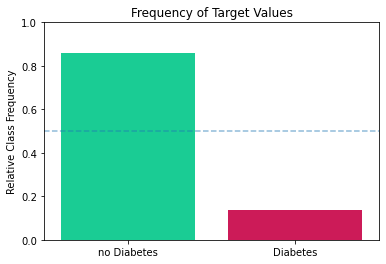

In [5]:
mapping = {0:"no Diabetes",1:"Diabetes"} 
plt.bar(y_train.value_counts().index,y_train.value_counts()/y_train.shape[0],tick_label=y_train.value_counts().index.map(mapping),color=["#1ACC94","#CC1B58"])
plt.hlines(0.5,-0.5,1.5,ls="--",alpha=0.5)
plt.xlim(-0.5,1.5)
plt.ylim(0,1)
plt.title("Frequency of Target Values")
plt.ylabel("Relative Class Frequency")
plt.show() #distribution of data in the target variable

In [53]:
#percentage distribution in the target variable
count_no_Diab = len(dataset[data['Diabetes']==0])
count_with_Diab = len(dataset[data['Diabetes']==1])
pct_with_no_Diab = count_no_Diab/(count_no_Diab+count_with_Diab)
print("percentage with no Diabetes is", pct_with_no_Diab*100)
pct_with_Diab = count_with_Diab/(count_no_Diab+count_with_Diab)
print("percentage with Diabetes", pct_with_Diab*100)

percentage with no Diabetes is 86.06669820245979
percentage with Diabetes 13.933301797540206


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

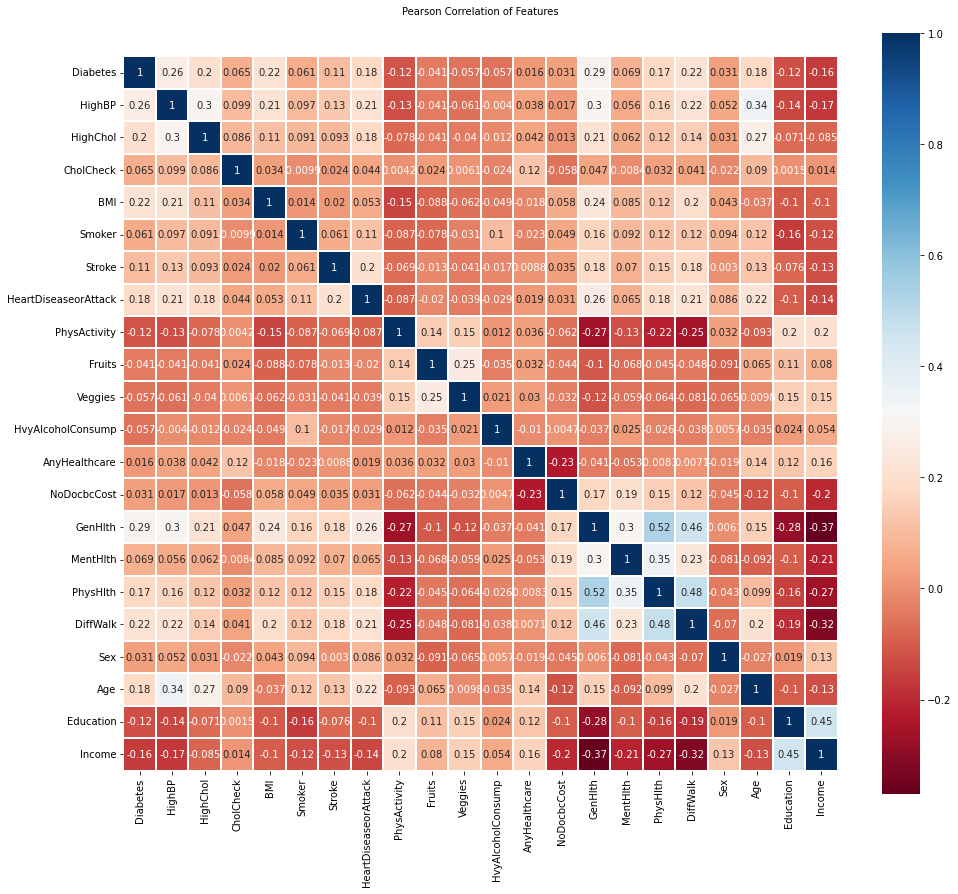

In [54]:
#checking the feature importance with Pearson correlation coefficient
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Pearson Correlation of Features', y=1.05, size=10)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Model training 

In [6]:
#splitting dataset into train and test
x = dataset.drop(["Diabetes"],axis=1)
y = dataset["Diabetes"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [7]:
regressor = LogisticRegression(max_iter=1E6)
regressor.fit(x_train,y_train)
predictions = regressor.predict(x_test)
y_pred = regressor.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Logistic_Regression classification accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Logistic_Regression classification accuracy: 0.8624645222327342
[[42627   898]
 [ 6080  1131]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43525
         1.0       0.56      0.16      0.24      7211

    accuracy                           0.86     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



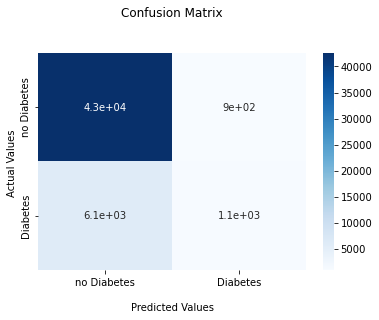

In [57]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['no Diabetes','Diabetes'])
ax.yaxis.set_ticklabels(['no Diabetes','Diabetes'])

## Display the visualization of the Confusion Matrix.
plt.show()

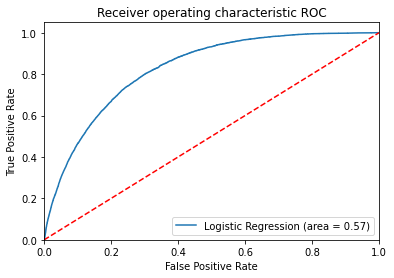

In [58]:
logit_roc_auc = roc_auc_score(y_test, regressor.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

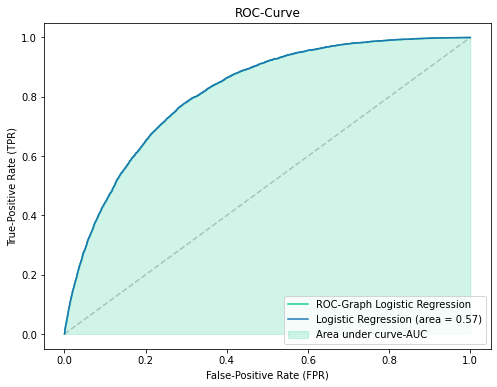

In [59]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
plt.figure(figsize=(8,6))
plt.title("ROC-Curve")
regressor.predict_proba(dataset.drop(["Diabetes"],axis=1))[:,1:]
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, regressor.predict_proba(x_test)[:,1:])
plt.plot([0,1],[0,1],ls="--",c="black",alpha=0.2)
plt.plot(fpr,tpr,label="ROC-Graph Logistic Regression",c="#1ACC94")
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.fill_between(fpr,tpr,color="#1ACC94",alpha=0.2,label="Area under curve-AUC")
plt.xlabel("False-Positive Rate (FPR)")
plt.ylabel("True-Positive Rate (TPR)")
plt.legend()
plt.show()

In [60]:
clf = LogisticRegression(solver="liblinear").fit(x, y)
#non-thresholded decision values
roc_auc_score(y, clf.decision_function(x))

0.8221154180296105

Decision Tree

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)*100 #F1 score


79.6219646799117

In [21]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)
print(classification_report(y_test, y_pred))

[[38106  5514]
 [ 4825  2291]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43620
         1.0       0.29      0.32      0.31      7116

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.59     50736
weighted avg       0.80      0.80      0.80     50736



In [22]:
#Optimizing Decision Tree with Entropy and Max_depth
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth =None, min_samples_leaf =5)
clf_entropy.fit(x_train, y_train)
y_pred_en = clf_entropy.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
print(cm)
print(classification_report(y_test, y_pred_en))
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

[[38106  5514]
 [ 4825  2291]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     43620
         1.0       0.36      0.26      0.30      7116

    accuracy                           0.83     50736
   macro avg       0.62      0.59      0.60     50736
weighted avg       0.81      0.83      0.82     50736

Accuracy is  83.26631977294228


In [23]:
#Decision Tree Optimization with GridsearchCV
param_griddt = {"criterion":("gini","entropy"), "max_depth":[1,3,5,7,9,12]}
grid_modeldt = GridSearchCV(estimator=model, param_grid=param_griddt)
grid_modeldt.fit(x_train,y_train)
print("Best score: ", grid_modeldt.best_score_, "Best parameters:", grid_modeldt.best_params_) 

Best score:  0.8651992692563081 Best parameters: {'criterion': 'entropy', 'max_depth': 5}


In [24]:
model = DecisionTreeClassifier(criterion = "gini", max_depth =5, min_samples_leaf =5)
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
model.score(x_test,y_test)*100 #F1 score

86.32726269315674

In [25]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)
print(classification_report(y_test, y_pred))

[[42997   623]
 [ 6314   802]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43620
         1.0       0.56      0.11      0.19      7116

    accuracy                           0.86     50736
   macro avg       0.72      0.55      0.56     50736
weighted avg       0.83      0.86      0.82     50736



Feature Importance

Feature importances:
[0.42336133 0.05338521 0.         0.13353988 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.33499931 0.         0.         0.         0.
 0.05471427 0.         0.        ]


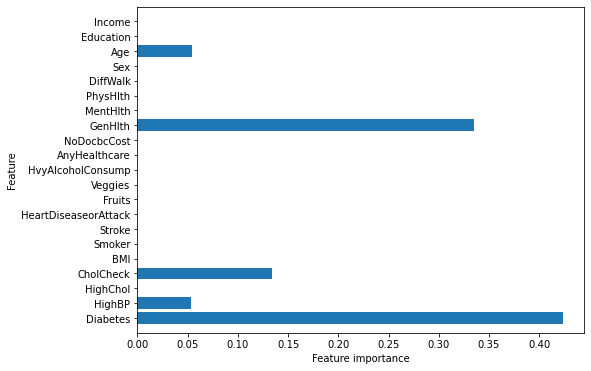

In [26]:
data_features = [x for i,x in enumerate(dataset.columns) if i!=8]
def plot_feature_importances_dataset(model):
    plt.figure(figsize=(8,6))
    n_features = 21
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
print("Feature importances:\n{}".format(model.feature_importances_))
plot_feature_importances_dataset(model)
plt.savefig('feature_importance')

Naive Bayes

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)  
gnb = GaussianNB()
model_nb = gnb.fit(x_train, y_train)
preds = gnb.predict(x_test)

In [88]:
# why does this  error message appear when I remove the imports?
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = gnb.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[35191  8374]
 [ 3097  4074]]
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43565
         1.0       0.33      0.57      0.42      7171

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.64     50736
weighted avg       0.84      0.77      0.80     50736



KNN

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=105)
knn = KNeighborsClassifier(n_neighbors =9)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Accuracy: %.2f" % accuracy_score(y_test, pred))

[[63520  2108]
 [ 8822  1654]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65628
         1.0       0.44      0.16      0.23     10476

    accuracy                           0.86     76104
   macro avg       0.66      0.56      0.58     76104
weighted avg       0.82      0.86      0.83     76104

Accuracy: 0.86


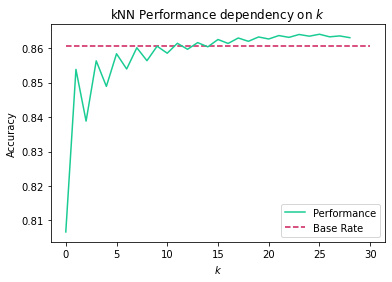

In [92]:
#finding the optimal K-value
performances = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    performances.append(knn.score(x_test,y_test))
plt.figure(figsize=(6,4))
plt.plot(performances,label="Performance",c="#1ACC94")
plt.hlines(dataset["Diabetes"].value_counts()[0]/dataset.shape[0],0,30,ls="--",label="Base Rate",color="#CC1B58")
plt.title("kNN Performance dependency on $k$")
plt.xlabel("$k$")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, y_train)

Ensemble Methods

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
rf_classifier = RandomForestClassifier() 
# fit the model on the training set 
rf_classifier.fit(x_train, y_train) 
# make predictions on the test set 
predictions = rf_classifier.predict(x_test)
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.86


In [10]:
sgb_classifier = GradientBoostingClassifier() 
# fit the model on the training set 
sgb_classifier.fit(x_train, y_train) 
# make predictions on the test set 
predictions = sgb_classifier.predict(x_test) 
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.87


In [11]:
regressor = LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=1E6)
regressor.fit(x_train,y_train)
predictions = regressor.predict(x_test)
print("Logistic_Regression classification accuracy:", accuracy_score(y_test, predictions))

Logistic_Regression classification accuracy: 0.8624645222327342


In [12]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.86 (+/- 0.00) [Logistic Regression]
Accuracy: 0.86 (+/- 0.00) [Random Forest]
Accuracy: 0.77 (+/- 0.01) [naive Bayes]
Accuracy: 0.86 (+/- 0.00) [Ensemble]


Comparing Models


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True) 

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SGD', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Bag', BaggingClassifier()))
models.append(('AdB', AdaBoostClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.862208 (0.002191)
KNN: 0.847580 (0.001755)
CART: 0.797580 (0.002965)
NB: 0.773471 (0.002301)
SGD: 0.866493 (0.002439)
RF: 0.859492 (0.001833)
Bag: 0.847879 (0.002328)
AdB: 0.865003 (0.002205)
